## [keras-ocr](https://keras-ocr.readthedocs.io/en/latest/index.html) pipeline test with pretrained models

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


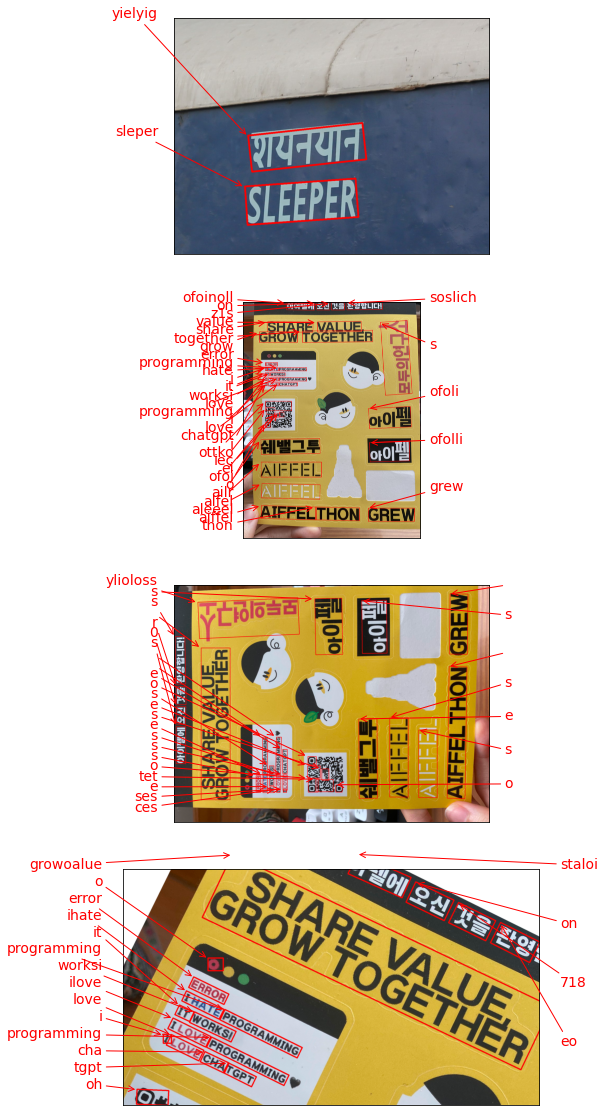

In [1]:
import os
import matplotlib.pyplot as plt

import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
HOME_DIR = os.getenv('HOME')+'/aiffel/ocr'
SAMPLE_IMG_PATH = HOME_DIR + '/data/sample.jpg'
AIFFEL_IMG_PATH = HOME_DIR + '/images/aiffel.jpg'
AIFFEL_ROT_IMG_PATH = HOME_DIR + '/images/aiffel_rot.png'
AIFFEL_CROP_IMG_PATH = HOME_DIR + '/images/eng_only.png'

images = [
    keras_ocr.tools.read(url) for url in [
        SAMPLE_IMG_PATH,
        AIFFEL_IMG_PATH,
        AIFFEL_ROT_IMG_PATH,
        AIFFEL_CROP_IMG_PATH
    ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

- 이전에 앞서 직접 학습시킨 [CRNN model](./0305_ocr_impl.ipynb)에 비해 제대로 인식한 단어가 훨씬 더 많음
- 하지만 역시 한글은 인식 불가능
- 90도 회전한 이미지에 대해서도 문자 인식이 어려운듯
- 살짝 회전한 이미지는 인식의 정확도는 조금 떨어졌지만 괜찮음

### 회고
- Text detector는 회전 유무에 관계없이 잘 감지하는 것 같음
- 하지만 그에 반해 인식기는 미리 학습된 모델을 사용해도 성능이 많이 떨어졌음
- 한국어 인식기는 [클로바](https://guide.ncloud-docs.com/docs/clovaocr-example01)에서 제공을 하는데 나중에 시간이 나면 해봐야겠음
- 이 외에도 동일 모델을 사용하고 한국어 데이터셋으로 학습시킨 결과도 있었는데 좋은 성능을 내지 못했음 아마도 모델의 한계점이겠지
- 구글 번역기에 실시간으로 화면에 나오는 이미지를 번역해주는 기능이 있는데, 여러 언어를 학습하기 위해 어떻게 했을까 궁금